# Discovery and Learning with Big Data/Machine Learning 

# Drew Murray 

# Machine Learning Kmeans and DBSCAN; Clustering algorithms for Anomaly Detection

# Mall Customers Segmentation 

## Anomalies or outliers

Anomalies and outliers are often used interchangeably.  Outliers are extreme 
data values that are distant from other values in your dataset. Outliers can 
distort the conclusions you draw from descriptive statistics (like mean and 
standard deviation) and from data visuals (like histograms and scatter plots). Many machine learning algorithms and statistical models are also sensitive to the range and distribution of data values used in your training data. Some of the most common causes of outliers in a dataset include data entry errors 
(human errors), measurement errors (instrument errors), and data processing 
errors (data manipulation errors). Consequently, outliers can come from 
multiple sources and hide in a single feature or n-dimensional feature space. Aside from the specific task of investigating these extreme data values (for 
anomaly detection) or in the case of naturally occurring outliers (novelties), the goal is often to remove or ignore outliers in your analysis.

## The following Anomaly Detection Techniques are good examples that can be used for Customer Segmentation.

We all know that human diversity, whether it be gender, age, education, gender expression or even food preferences, is a quality to be celebrated. While this is easier to accomplish in our day-to-day activities, from a business perspective, treating everyone as an individual is unrealistic, if not impossible, 
even though the business community is working on it.

This is what motivates market segmentation. While you may not be able to serve your clients on an individual basis right now, you can do the next best thing by identifying their commonalities and differences, grouping them into small 
subgroups, and catering to their requirements. Even if ten thousand of your 
other clients received the same discount code in their email, this can give 
them the impression that you are communicating to them as an individual.

## Clustering 

Clustering is an example of an unsupervised machine learning algorithm.

When new data is presented, the fundamental idea behind employing a clustering algorithm for anomaly detection is to group data based on the structure and 
variables without any prior knowledge about the data.  Another way to say this is that the purpose is to find "natural" groups in an unlabeled dataset.  This information is then used to determine whether or not there are any anomalous 
points are present.

Techniques such as customer segmentation, text clustering, and image 
segmentation are the most popular techniques of clustering.

There are many clustering algorithms. It is important to choose the best 
algorithm and the best one to use depends on the database and client 
requirements as well as client expectations.

## How do you segment your market? 

K-means clustering is usually one of the first methods used.  Because K-means is one of, if not the only, data clustering techniques taught in statistics 
classrooms, it's only natural that business analysts would use it when a 
project required market segmentation. As we learned in the lecture on KMeans,  K-means is simple to learn and effective with massive data sets. But, like all statistical approaches, K-means clustering relies on specific assumptions, and if those assumptions prove to be correct, the method is useless.

Every data point is given to a cluster in the K-Means clustering result, and 
the mean of the points is the centroid of each cluster. As a result, each 
point contributed to the cluster's formation. In reality, it's not uncommon 
for certain data points to stray from the "norm", resulting in anomalies or 
outliers. 

A single outlier in a dataset can cause the entire clustering result to be 
skewed. Furthermore, clusters formed using K-Means are more spherical; yet, if clusters are of other odd or elliptical shapes, inaccuracies can develop. 
Scree plots and silhouette plots can help you decide on parameter k, however, model sensitivity to anomalies has a big influence on them. The goal of 
developing a new strategy is to overcome the drawbacks of existing methods. 
The majority of K-Means drawbacks are dealt with or handled by DBSCAN.

DBSCAN is a density-based non-parametric unsupervised learning algorithm. The DBSCAN has fewer assumptions, a more flexible model, and a larger range of 
applications than KMeans. However, DBSCAN, like K-Means, groups data according to their similarities using distance functions.   DBSCAN also uses densities 
to form groups of data.  The term "density" refers to the number of points in the region indicated by the model parameters.


## Import Libraries

In [2]:
# importing basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans 
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.graph_objs as go

#filter warnings
import warnings
warnings.filterwarnings("ignore")

- Pandas library is imported to use the pandas dataframe for data analysis
- Seaborn library is imported for better data visualizations
- Matplotlib library is imported to produce plots for data visualizations
- Stats is imported from the Scipy library for statistical analysis
- Silhuoette_score is imported from the submodule of scikit learn called metrics, this is used to compute the silhouette score for cluster analysis. 
- DBSCAN is imported from the submodule of sckit learn called cluster, this is used to compute the DBSCAN clustering method
- KMeans is imported from the submodule of sckit learn called cluster, this is used to compute the KMeans clustering method
- Product is imported from itertools to increase iteration performance
- Axes3D is imported from mpl_toolkits.mplot3d to help create 3d plots
- Plotly library is imported to create interactive data visualizations
- The submodule from plotly called graph_objs is imported to produce interactive plots
Warning is imported and then filtered to ignoring output warnings


## Print Library Versions 

In [3]:
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 2.0.3
numpy version: 1.25.0
seaborn version: 0.12.2


This will print the current versions of the pandas, numpy and seaborn libraries 


## Load Data Set & Get Dataset Shape

In [4]:
mall_data = pd.read_csv("C:/Users/dgmur/OneDrive/Desktop/ADTA 5340 Discovery and Learning with Big Data/Mall_Customers.csv")

print('There are {} rows and {} columns in our dataset'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset


pd.read_csv() containing the filepath for the mall data csv will convert it into a dataframe. This is assigned to a variable called mall_data. Then inside the print function, and inside the quotations, there are 2 curly brackets in the text, this is a placeholder for the variables in the format function. In this case, the first index of the mall_data.shape() is assigned to the first set of curly brackets, then the second index of the mall_data.shape() is assigned to the second set of curly brackets.

## Get Dataset Information 

In [5]:
mall_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


mall_data.head() will output the first 5 rows of mall_data.


In [6]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


This will output the summary statistics of mall_data, this includes the count, minimum, 25% quartile, median, mean, 75% quartile, standard deviation, and maximum. 


In [7]:
mall_data.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

This will output the total amount of null values in each column of mall_data. 


## Exploratory Data Analysis 

Distribution - Age 

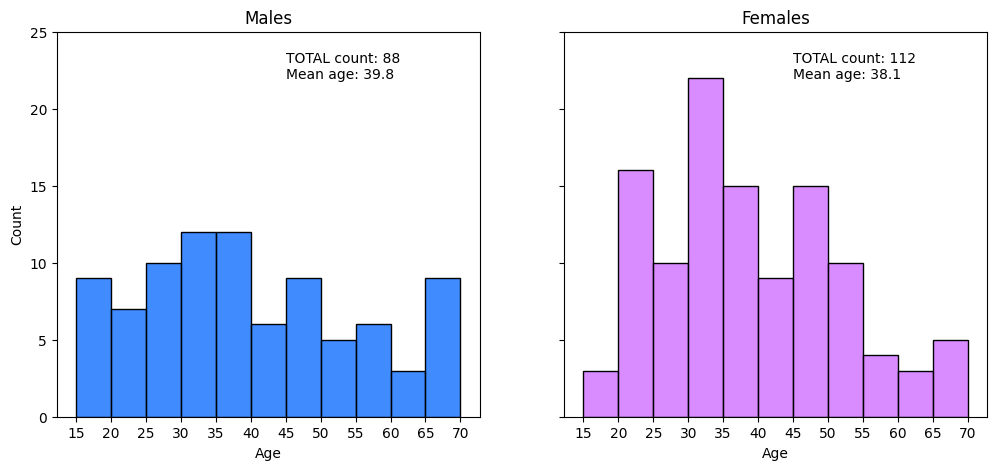

In [8]:
males_age = mall_data[mall_data['Genre']=='Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Genre']=='Female']['Age'] # subset with females age
males_income = mall_data[mall_data['Genre']=='Male']['Annual Income (k$)'] # subset with males age
females_income = mall_data[mall_data['Genre']=='Female']['Annual Income (k$)'] # subset with females age


age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.histplot(males_age,bins=age_bins, color='#0066ff', ax=ax1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.histplot(females_age, bins=age_bins,  color='#cc66ff', ax=ax2, )
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

A subset called males_age is created. This will include all of the observations where the column genre is Male, and their corresponding age from the age column. 
A subset called female_age is created. This will include all of the observations where the column genre is Female, and their corresponding age from the age column.
A subset called males_income is created. This will include all of the observations where the column genre is Male, and their corresponding income value from the Annual Income (k$) column.
A subset called females_income is created. This will include all of the observations where the column genre is Female, and their corresponding income value from the Annual Income (k$) column.
The range function has a start value specified to 15, a stop value specified to 75, and a step value specified to 5. This is assigned to age_bins. 
2 subplots are created consisting of 2 names ax1, ax2,, where each subplot has a figsize Value of 18x5, and they share the same y axis . Sns.distplot () is used to create a histogram for the males_ages subset, where the bins are based on age_bins, with the color of the plot being specified to the value #006ff. The ax parameter is assigned to ax1, and lastly the edge color is assigned the value k with a linewidth of 2. The ax1.set_xticks will set the tick marks based on age_bins. Ax.set_ylim will have a maximum value of 25. The title of the subplot will be called “Males”, and the y axis will be called “Count”. The text in 45,23, 19 position,, “TOTAL count:” contains a curly bracket, this a  place holder. The count of males_ages will replace the placeholder using the format function. 
The text in 45, 22 position,, “Mean age:” contains a curly bracket, this si a place holder where the place holder will be float that is one decimal place. The mean of males_ages will replace the placeholder using the format function. 
 Sns.distplot () is used to create a histogram for the females_ages subset, where the bins are based on age_bins, with the color of the plot being specified to the value #cc66ff. The ax parameter is assigned to ax2, and lastly the edge color is assigned the value k with a linewidth of 2. The ax1.set_xticks will set the tick marks based on my_bin.. The title of the subplot will be called “Females”, and the y axis will be called “Count”. The text in 45,23  position,, “TOTAL coubt” contains a curly bracket, this a  place holder. The count of females_ages will replace the placeholder using the format function. 
The text in 45,22 position,, “Mean ages:” contains a curly bracket, this si a place holder where the place holder will be float that is one decimal place. The mean of females_ages will replace the placeholder using the format function. 



In [9]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


Inside the print function is the text, "Kolgomorov-Smirnov test p-value" followed by a curly bracket which is a placeholder for a floating point that is 2 decimal places. This is followed by the format function, inside this function will replace the place  holder in the text. In this case it is the stats.ks_2samp () containing males_age and females_age, then followed by the position index of 1 of the ouput which is the p-value of the KS test. 

Male age is more evenly distributed than females. The biggest age group for women is between 30-35, and for men, it is between 30-40. The Kolmogorov-Smirnov test shows the difference between the males and females age group is statistically insignificant as it calculates the P-value. A P-value that is less than or equal to 0.05 is statistically significant.

## Distribution - Annual Income (k$)


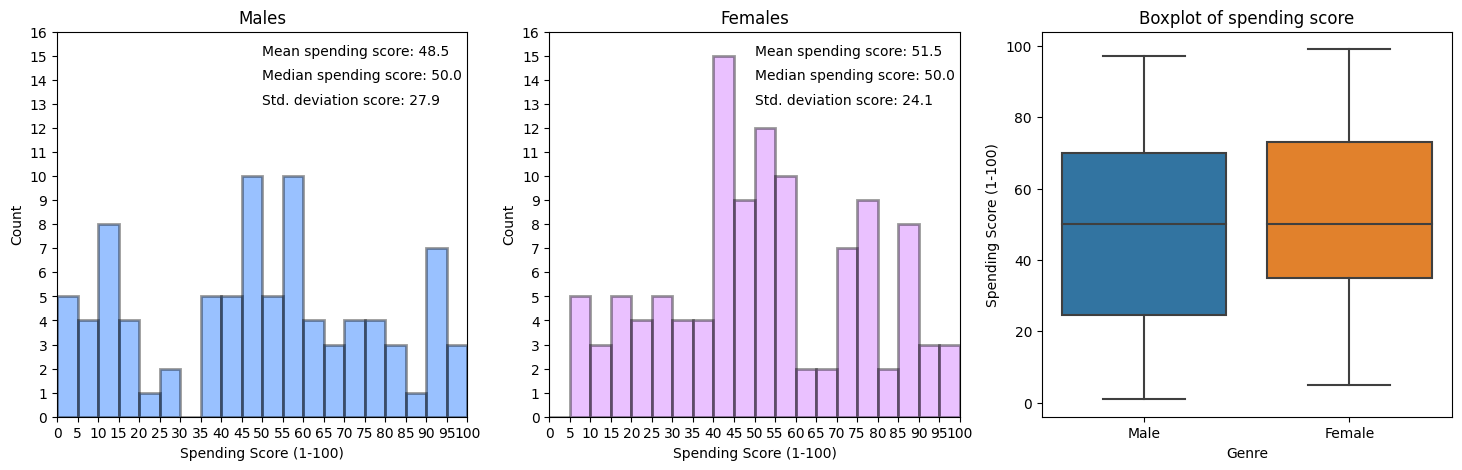

In [10]:
males_spending = mall_data[mall_data['Genre']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Genre']=='Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

A subset called males_income is created. This will include all of the observations where the column genre is Male, and their corresponding income from the Annual income (k$) column. 
A subset called females_income is created. This will include all of the observations where the column genre is Female, and their corresponding income from the Annual income (k$) column. 

The range function has a start value specified to 10, a stop value specified to 150, and a step value specified to 10. This is assigned to my_bins
3 subplots are created consisting of 3 names ax1, ax2, ax3, where each subplot has a figsize Value of 18x5. Sns.distplot () is used to create a histogram for the males_income subset, where the bins are based on my_bins, with no kde, with the color of the plot being specified to the value #006ff. The ax parameter is assigned to ax1, and lastly the edge color is assigned the value k with a linewidth of 2. The ax1.set_xticks will set the tick marks based on my_bin. The ax_yticks contains the range function, this range function will make the y tick marks start at 0, 24 stop at but will not include 24, each tick mark increases by a value of 2. Ax.set_ylim will have a minimum value of 0 and a maximum value of 22. The title of the subplot will be called “Males”, and the y axis will be called “Count”. The text in 85, 19 position,, “Mean income:” contains a curly bracket, this a  place holder where the place holder will be float that is one decimal place. The mean of males_income will replace the placeholder using the format function.
The text in 85, 18 position,, “Median income:” contains a curly bracket, this si a place holder where the place holder will be float that is one decimal place. The median of males_income will replace the placeholder using the format function. 
The text in 85, 17 position,, “Std. Deviation: income:” contains a curly bracket, this a  place holder where the place holder will be float that is one decimal place. The standard deviation of males_income will replace the placeholder using the format function.
 Sns.distplot () is used to create a histogram for the females_income subset, where the bins are based on my_bins, with no kde, with the color of the plot being specified to the value #cc66ff. The ax parameter is assigned to ax2, and lastly the edge color is assigned the value k with a linewidth of 2. The ax1.set_xticks will set the tick marks based on my_bin. The ax_yticks contains the range function, this range function will make the y tick marks start at 0, 24 stop at but will not include 24, each tick mark increases by a value of 2. Ax.set_ylim will have a minimum value of 0 and a maximum value of 22. The title of the subplot will be called “Females”, and the y axis will be called “Count”. The text in 85, 19 position,, “Mean income:” contains a curly bracket, this a  place holder where the place holder will be float that is one decimal place. The mean of females_income will replace the placeholder using the print function. 
The text in 85, 18 position,, “Median income:” contains a curly bracket, this si a place holder where the place holder will be float that is one decimal place. The median of females_income will replace the placeholder using the print function. 
The text in 85, 17 position,, “Std. Deviation: income:” contains a curly bracket, this a  place holder where the place holder will be float that is one decimal place. The standard deviation of females_income will replace the placeholder using the print function.
Using a the sns.boxplot function, a boxplot is created to where the x axis is the genre column, the y axis is the  Annual income, where data is specified to mall_data and the ax is specified to ax3. The title of this plot will be called “Boxplot of annual income”. Plt.show will output all the subplots. 


In [11]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


Inside the print function is the text, "Kolgomorov-Smirnov test p-value" followed by a curly bracket which is a placeholder for a floating point that is 2 decimal places. This is followed by the format function, inside this function will replace the place  holder in the text. In this case it is the stats.ks_2samp () containing males_income and females_income, then followed by the position index of 1 of the ouput which is the p-value of the KS test. 

## Distribution - Annual Income (k$)

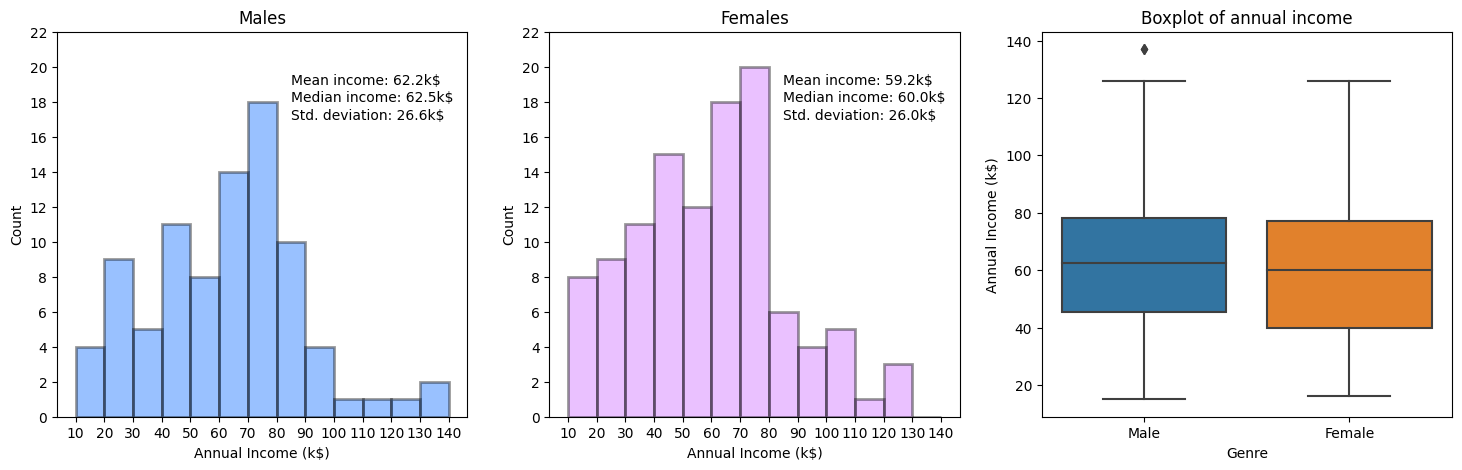

In [12]:
males_income = mall_data[mall_data['Genre']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Genre']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Genre', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

A subset called males_spending is created. This will include all of the observations where the column genre is Male, and their corresponding spending score from the Spending score (1-100) column. 
A subset called females_spending is created. This will include all of the observations where the column genre is Female, and their corresponding spending score from the Spending score (1-100)  column.
The range function has a start value specified to 0, a stop value specified to 105, and a step value specified to 5. This is assigned to spending_bins
3 subplots are created consisting of 3 names ax1, ax2, ax3, where each subplot has a figsize Value of 18x5. Sns.distplot () is used to create a histogram for the males_income subset, where the bins are based on my_bins, with no kde, with the color of the plot being specified to the value #006ff. The ax parameter is assigned to ax1, and lastly the edge color is assigned the value k with a linewidth of 2. The ax1.set_xticks will set the tick marks based on spending_bins. The ax_yticks contains the range function, this range function will make the y tick marks start at 0, 17 stop at but will not include 17, each tick mark increases by a value of 1. Ax.set_ylim will have a minimum value of 0 and a maximum value of 16. The title of the subplot will be called “Males”, and the y axis will be called “Count”. The text in 50,15 position,, “Mean spending score:” contains a curly bracket, this a  place holder where the place holder will be float that is one decimal place. The mean of males_spending will replace the placeholder using the format function.
The text in 50, 14 position,, “Median spending score:” contains a curly bracket, this si a place holder where the place holder will be float that is one decimal place. The median of males_spending will replace the placeholder using the format function. 
The text in 50,13 position,, “Std. Deviation: income:” contains a curly bracket, this a  place holder where the place holder will be float that is one decimal place. The standard deviation of males_spending will replace the placeholder using the format function.
 Sns.distplot () is used to create a histogram for the males_income subset, where the bins are based on my_bins, with no kde, with the color of the plot being specified to the value #006ff. The ax parameter is assigned to ax1, and lastly the edge color is assigned the value k with a linewidth of 2. The ax1.set_xticks will set the tick marks based on spending_bins. The ax_yticks contains the range function, this range function will make the y tick marks start at 0, 17 stop at but will not include 17, each tick mark increases by a value of 1. Ax.set_ylim will have a minimum value of 0 and a maximum value of 16. The title of the subplot will be called “Females”, and the y axis will be called “Count”. The text in 50,15 position,, “Mean spending score:” contains a curly bracket, this a  place holder where the place holder will be float that is one decimal place. The mean of females_spending will replace the placeholder using the format function.
The text in 50, 14 position,, “Median spending score:” contains a curly bracket, this si a place holder where the place holder will be float that is one decimal place. The median of females_spending will replace the placeholder using the format function. 
The text in 50,13 position,, “Std. Deviation: income:” contains a curly bracket, this a  place holder where the place holder will be float that is one decimal place. The standard deviation of females_spending will replace the placeholder using the format function.Using a the sns.boxplot function, a boxplot is created to where the x axis is the genre column, the y axis is the spending score (1-100), where data is specified to mall_data and the ax is specified to ax3. The title of this plot will be called “Boxplot of spending score”. Plt.show will output all the subplots.

In [13]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


Inside the print function is the text, "Kolgomorov-Smirnov test p-value" followed by a curly bracket which is a placeholder for a floating point that is 2 decimal places. This is followed by the format function, inside this function will replace the place  holder in the text. In this case it is the stats.ks_2samp () containing males_income and females_spending, then followed by the position index of 1 of the ouput which is the p-value of the KS test. This will output the text and the p-value

## Distribution - Median Annual Income of Male and Female Customers

In [14]:
medians_by_age_group = mall_data.groupby(["Genre",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Genre', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

The medians_by_age_group subset is created by using the mall_data.groupby() function containing genre and pd.cut with mean median of the age column which will bin the values based on the median. An index is added to medians_by_age_group by using the index function followed by set_names containing genre and Age_group. The column index for this subset is now Genre and Age group. This is assigned to medians_by_age_group.index. Lastly the new index is updated to the medians_by_age_group subset. 

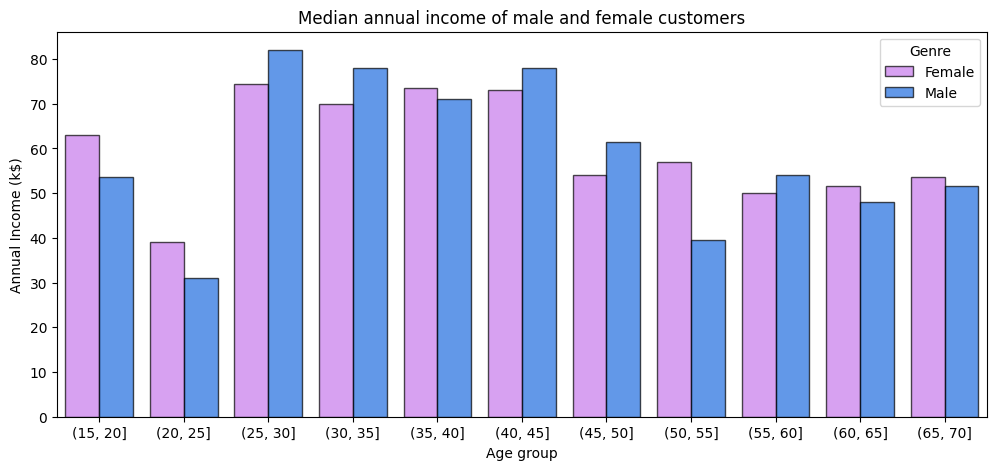

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Genre', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

A subplot is created with a 12x5 value using plt.subplots and assigned to fig and ax. A barplot is created by using the sns.barplot (). Where x is Age group and y is Annual income, the hue is specified to the genre column and the data is based on the medians_by_age_group, The palettes are the values “cc66ff and #0066f in a list form, where the alpha, which indicates the transparency, is 0.7, the edgecolor is specified to k and the ax is specified to the variable ax. The plot titled “Median annual income of male and female customers” using the ax.set_title () function and the x axis is labeled “Age group” using the ax.set_xlabel. Then plt.show will output the subplot. 


## Correlations

Pearson's Correlation for Age & Spending Score (1-100) with jointplot

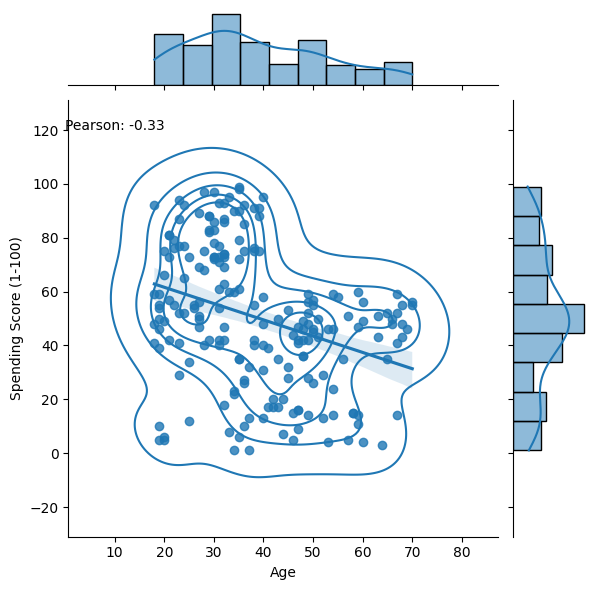

In [16]:
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot(data=mall_data, x = 'Age', y = 'Spending Score (1-100)',
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

The pearsonr function is imported from the scipy submodule, stats to compute the pearson's correlation of the data
The personr function is called to compute pearson's correlation of Age and Spending Score columns from mall_data. This is assigned to corr, the underscore will remove p-value from the output. 
sns.jointplot will create a jointplot displaying a scatterplot where data is specified to mall_data and x and y is specified to Age and Spendign score (1-100). Next the kind parameter is 'reg' which will add a regression line to the plot. Lastly, the plot_joint function containing the sns.kdeplot, followed by the zorder being 0 and the n_levels being 6. This will add a kde plot and 6 contour levels to the jointplot. 
The plt.text function will add a text annonation to the 0,120 position of the plot. Where the text diplays, "Pearson" followed by a curly bracket which is a place holder for a floating point that is 2 decimal places long. This followed by the format() function. This will replace the placeholder in the text. In this case, it is corr. 
plt.show() will output the pairplot. 



## Pearson's Correlation for Age & Annual Income with lineplot (Implot)

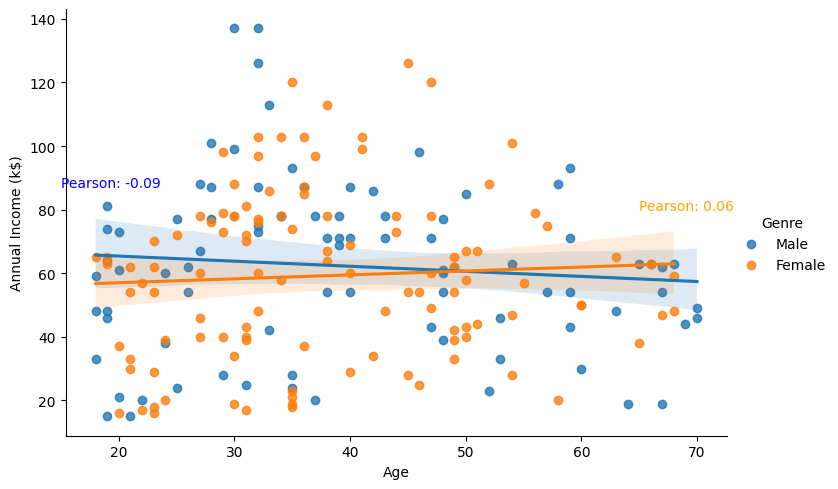

In [17]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(data=mall_data, x = 'Age', y = 'Annual Income (k$)',hue='Genre',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

The corr1 variable is assigned the pearsonr () containing males_age.values, males_income.values. This use the values of males_age and males_income in array format and calculate pearson's correlation. The corr2 variable is assigned the pearsonr () containing females_age.values, females_income.values. This use the values of females_age and females_income in array format and calculate pearson's correlation.
The underscore that are followed by the variable will remove the p-value element of the output. 
Next a line plot is created using the sns.plot where data is specified to mall_data, x is Age, y is Annual income (k$), hue is specified to genre and aspect is 1.5. Age is the x axis, Annual income is the y axis and the color of the scatter points are based on the genre variable of mall_data. Lastly 2 text annotations are created using the plt.text(). The first one is in the 15,87 position containing the text "Pearson" followed by a curly bracket which is a place holder for a floating point that is 2 decimal places long. The format function will replace the placeholder, in this case it corr1, and the font color is specified to blue. the second one is in the 65,80 position containing the text "Pearson" followed by a curly bracket which is a place holder for a floating point that is 2 decimal places long. The format function will replace the placeholder, in this case it corr2, and the font color is specified to orange. 
plt.show will output the lineplot. 

## Pearson's Correlation for Age & Spending Score (1-100) with line plot (Implot)

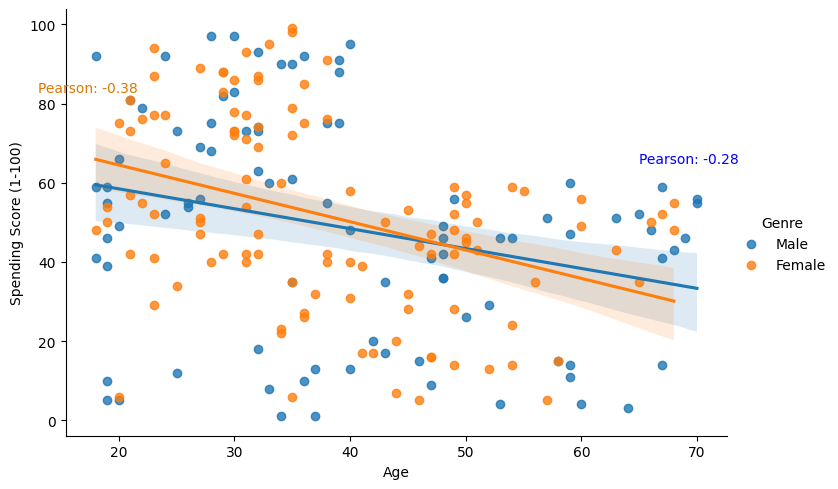

In [18]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(data=mall_data, x = 'Age', y = 'Spending Score (1-100)', hue='Genre',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

The corr1 variable is assigned the pearsonr () containing males_ages.values, males_spending.values. This use the values of males_age and males_spending in array format and calculate pearson's correlation. The corr2 variable is assigned the pearsonr () containing females_age.values, females_spending.values. This use the values of females_age and females_spending in array format and calculate pearson's correlation.
The underscore that are followed by the variable will remove the p-value element of the output. 
Next a line plot is created using the sns.plot where data is specified to mall_data, x is Age, y is Spending Score (1-100), hue is specified to genre and aspect is 1.5. Age is the x axis, Spending Score is the y axis and the color of the scatter points are based on the genre variable of mall_data. Lastly 2 text annotations are created using the plt.text(). The first one is in the 65,65 position containing the text "Pearson" followed by a curly bracket which is a place holder for a floating point that is 2 decimal places long. The format function will replace the placeholder, in this case it corr1, and the font color is specified to blue. the second one is in the 13,83 position containing the text "Pearson" followed by a curly bracket which is a place holder for a floating point that is 2 decimal places long. The format function will replace the placeholder, in this case it corr2, and the font color is specified to #d9790. 
plt.show will output the lineplot. 

## Pearson's Correlation for Annual Income & Spending Score (1-100) with line plot (Implot)

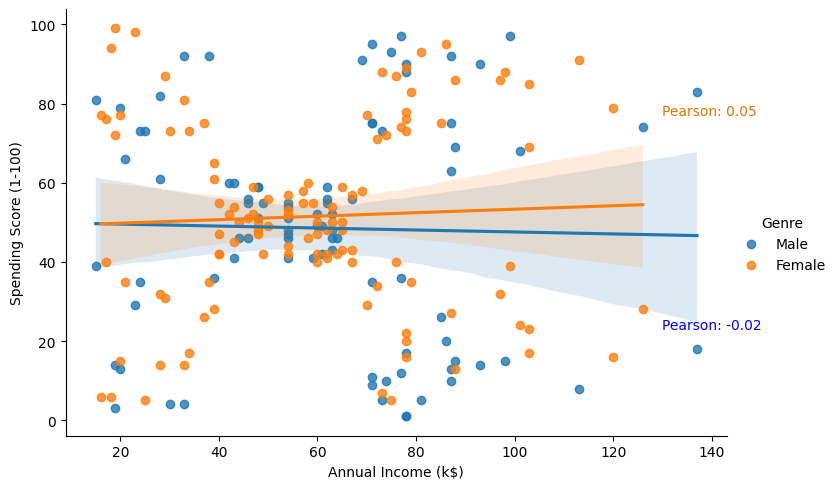

In [19]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=mall_data, hue='Genre',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

The corr1 variable is assigned the pearsonr () containing males_income.values, males_spending.values. This use the values of males_income and males_spending in array format and calculate pearson's correlation. The corr2 variable is assigned the pearsonr () containing females_income.values, females_spending.values. This use the values of females_income and females_spending in array format and calculate pearson's correlation.
The underscore that are followed by the variable will remove the p-value element of the output. 
Next a line plot is created using the sns.plot where data is specified to mall_data, x is Annual Income (k$), y is Spending Score (1-100), hue is specified to genre and aspect is 1.5. Annual income is the x axis, Spending Score is the y axis and the color of the scatter points are based on the genre variable of mall_data. Lastly 2 text annotations are created using the plt.text(). The first one is in the 130,23 position containing the text "Pearson" followed by a curly bracket which is a place holder for a floating point that is 2 decimal places long. The format function will replace the placeholder, in this case it corr1, and the font color is specified to blue. the second one is in the 130, 77 position containing the text "Pearson" followed by a curly bracket which is a place holder for a floating point that is 2 decimal places long. The format function will replace the placeholder, in this case it corr2, and the font color is specified to #d9790. 
plt.show will output the lineplot. 

# Clustering 

## K-Means

The K-Means algorithm is the most used partitional clustering technique. It gained popularity since it is so easy and simple to implement and it has had many successes in many diverse sectors. As we learned in our lecture for this module, K-Means is a greedy algorithm. Remember with the greedy algorithm to be aware of global optimization. Also, remember that the Euclidean distance is implemented and the number of clusters has to be predefined. In this homework, you will use the Elbow Method and Silhouette Score to calculate the K-value. For clustering, you will only use numerical columns.

In [20]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

mall_data followed by a nested list containing the variables Age, Annual Income (k$), Spending Score (1-100) in string format, this is assigned to the variable x_numerics. 

## Elbow Methods 

In order to find the optimal K number, look at the "elbow" in the graph.

In [21]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

N_clusters is assigned to a list of values from 2 to 10 that are the number of clusters. Both clusters_interia and s_scores are assigned an empty list. A for loop that uses n to pass through n_clusters: Inside the loop The KMeans function which contains the parameter n_clusters which is specified to n and init specified to 'k-means++'. Outside the function is the fit() containing x_numerics. This will use the kmeans where the number of clusters is based on what element n is on of n_clusters, the intialization method is the k-means++ algorithm X_numeric will be used for model fitting. Then the cluster_appedn(KM_est.inetrtia) will add the output of KM_est to the list of cluters_interia. Next silhouette_score function containing x_numerics and KM_est.labels. This will compute the silhouette score of x_numerics and KM_est.labels. This is assigned to the variable, silhouette_avg. S_scores.append(silhouette_avg) will add silhoutte_avg to the list of S_scores. This loop will continue until n has reached the last element of n_clusters. Then, n will exit the loop. 

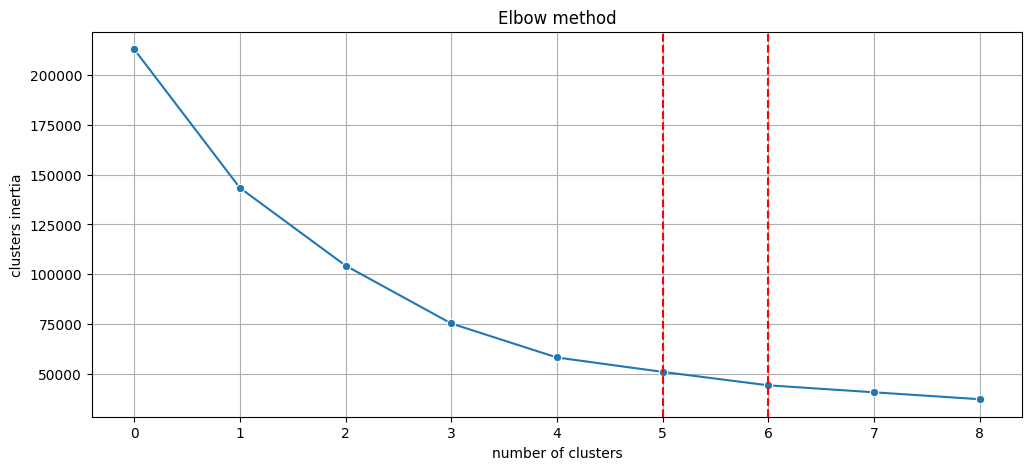

In [22]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

A 12x5 plot is created using the plt.subplot() containing figsize being equal to (12,5), this is assigned to the object fig and ax. The plot will be specified as an elbow based on the number of clusters and cluster intertia. This is done by using the sns.lineplot() containing cluster_interia, maker being specfied to 'o' and ax equal to the ax object. This is sns.plot() is assigned to ax. The title, "Elbow method", using ax.set_title(). The y axis is labeled, "Cluster inertia" using ax_setylabel(), The is x axis is labeled, "number of clusters" using ax.set_xlabel(). A red vertical line is on cluster 5 using ax.axvline containing 5, followed by ls specified to "--" and c equal to red.  A red vertical line is on cluster 6 using ax.axvline containing 6, followed by ls specified to "--" and c equal to red. Lastly plt.grid() will add the grid of the elbow plot and plt.show() will output the elbow plot. 

## Silhouette Score Method


Since there is no clear "elbow", the Silhouette Score will also be utilized. The Silhouette Score illustrates the distance between clusters and the range is between -1 and 1. The best score is the number closest to 1.

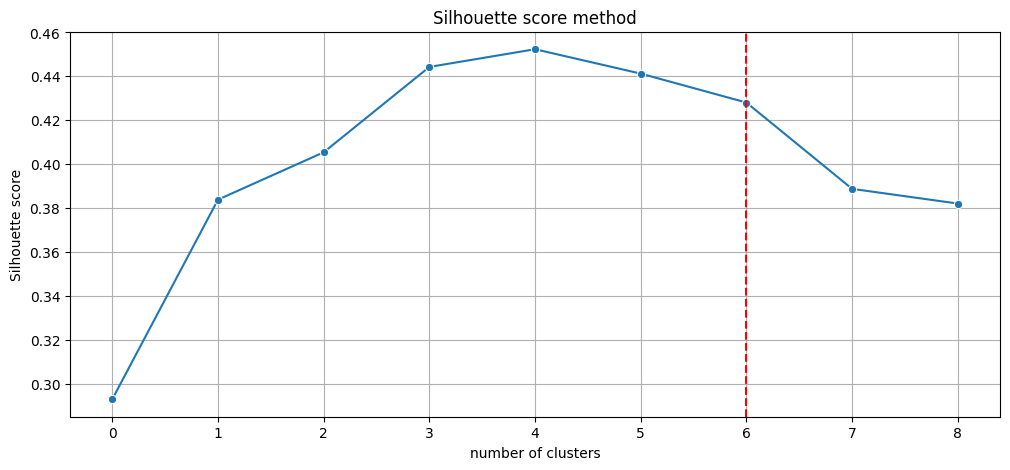

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

A 12x5 plot is created using the plt.subplot() containing figsize being equal to (12,5), this is assigned to the object fig and ax. The plot will be specified as an silhouette score method plotbased on the number of clusters and S_scores. This is done by using the sns.lineplot() containing s_scores, maker being specfied to 'o' and ax equal to the ax object. This is sns.plot() is assigned to ax. The title, "Silhouette score", using ax.set_title(). The y axis is labeled, "Silhouette score" using ax_setylabel(), The is x axis is labeled, "number of clusters" using ax.set_xlabel().   A red vertical line is on cluster number 6 using ax.axvline containing 6, followed by ls specified to "--" and c equal to red. Lastly plt.grid() will add the grid of the elbow plot and plt.show() will output the elbow plot.

## Let's try 5 clusters

In [24]:
KM5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM5_clusters.labels_ # append labels to points

Inside the KMeans() is n_cluster specified to 5, and init specified to 'k-means'. Outside the function is fit() which contains x_numerics. This will create a KMeans algorithm using 5 clusters with a initializations method of k-means++ where x_numerics are used for fitting the model. This is assigned to KM5_cluster. I copy of the X-numerics is saved and assigned as a variable called KM5_clustered. Then KM5_clusters.labels_  is assigned to KM_5.loc[:,'cluster']. This will append the labels to all the rows of the cluster column in KM5_clustered.

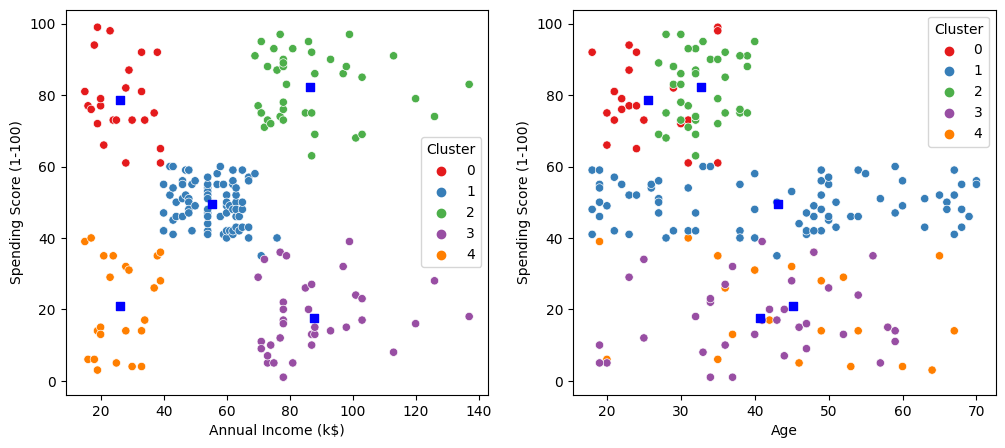

In [25]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))



scat_1 = sns.scatterplot(data=KM5_clustered, x='Annual Income (k$)', y='Spending Score (1-100)',
                 hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(data=KM5_clustered, x='Age', y='Spending Score (1-100)',
                 hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM5_clusters.cluster_centers_[:,1],KM5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM5_clusters.cluster_centers_[:,0],KM5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

2 scatterplots that have a figure size value of 12x5 are created using plt.subplot((1,2), figsize(12,5)). This is assigned to the objects fig1 and (axes). The first scatterplot is created using the sns,scatterplot() function. Inside the function is data specified to KM_5clustered, followed by x equal to 'Annual Income(k$), y being equal to 'Spending score (1-100)', then hue being specified to 'Cluster', ax specified to axes[0] palette specified to 'set1', and legend being specified to full. This scatterplot will  have annual income on the x axis and spending score on the y axis from the KM5_clustered data frame. The color of each scatter point is based on cluster number, the color palette consists of purple, green, orange, red, blue. There is also a legend for cluster number and this plot will be placed in 0 index position of axes. The second scatterplot is created using the sns,scatterplot() function. Inside the function is data specified to KM_5clustered, followed by x equal to 'Age', y being equal to 'Spending score (1-100)', then hue being specified to 'Cluster', ax specified to axes[1] palette specified to 'set1', and legend being specified to full. This scatterplot will  have age on the x axis and spending score on the y axis from the KM5_clustered data frame. The color of each scatter point is based on cluster number, the color palette consists of purple, green, orange, red, blue. There is also a legend for cluster number and this plot will be placed in 1 index position of axes.
Furthermore, the  centroids of each cluster are indicated and added for scatterplot in the 0 position index of axes, This is done by extracting all the rows of column 1 and 2 from the KM5_clusters.cluster_centers_ and making the marker blue with a style of s  and a size value of 40. Lastly the  centroids of each cluster are indicated and added for scatterplot in the 1 position index of axes, This is done by extracting all the rows of column 1 and 2 from the KM5_clusters.cluster_centers_ and making the marker blue with a style of s  and a size value of 40. 
plt.show() will output the scatterplots.



In [26]:
# Size of clusters
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
print(KM_clust_sizes)

         KM_size
Cluster         
0             23
1             79
2             39
3             36
4             23


KM5_clustered.group('cluster').size.to_frame() output the number of observations based on the cluster number, this is converted into a dataframe. This assigned the variable, KM_clust_sizes. Then column the column is labeled, KM_size by a list list containing KM_size in string format being assigned KM_clust_sizes.columns. KM_clust_sizes is outputted using the print function. 

In [27]:
#Create a 3D projection of 5 generated clusters.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

<Figure size 700x700 with 0 Axes>

The plt.figure containing figsize equal to (7,7) will create a plot that has a figure size value of 7x7 this assigned to fig. A 3d axes object is created using Axes3D() this is assigned to ax. Inside Axes3d() the rec parameter which indicates the position of the axes, this is specified to a list of 0,0,.99,1. Then the elevation parameter which is the viewing angle, has a value of 20, lastly, azim which is azimuthal viewing angel has a value of 210. 
ax.scatter() is used to create a 3d scatterplot. Inside this function are columns Age, Annual Income, and Spending Score from KM5_clustered. The colors of the scatter points are based on the cluster column of KM5_clustered. The scatter points have a size value of 35, the edgecolor has a value of k and the colormap is specified to plt.cmset1.  ax.w_xaxis.set_ticklabels([]), ax.w_yaxis.set_ticklabels([]), ax.w_zaxis.set_ticklabels([]) will give the x, y and z ticker label an empty list. The x axis is labeled, "Age", using ax.set_xlabel(), the y axis is labeled, "Annual Income (k$)", using ax.setylabel(), z axis is labeled. "Spending Score (1-100)", using ax.set_zlabel(), and the plot is titled "3D view of K-means 5 clusters", using ax.set_title(). Plt.show will output the 3d plot

## Let's try 6 Clusters

In [28]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

Inside the KMeans() is n_cluster specified to 6, and init specified to 'k-means'. Outside the function is fit() which contains x_numerics. This will create a KMeans algorithm using 5 clusters with a initializations method of k-means++ where x_numerics are used for fitting the model. This is assigned to KM_6_cluster. I copy of the X-numerics is saved and assigned as a variable called KM6_clustered. Then KM_6_clusters.labels_  is assigned to KM6_clustered.loc[:,'cluster']. This will append the labels to all the rows of the cluster column in KM_6_clustered.

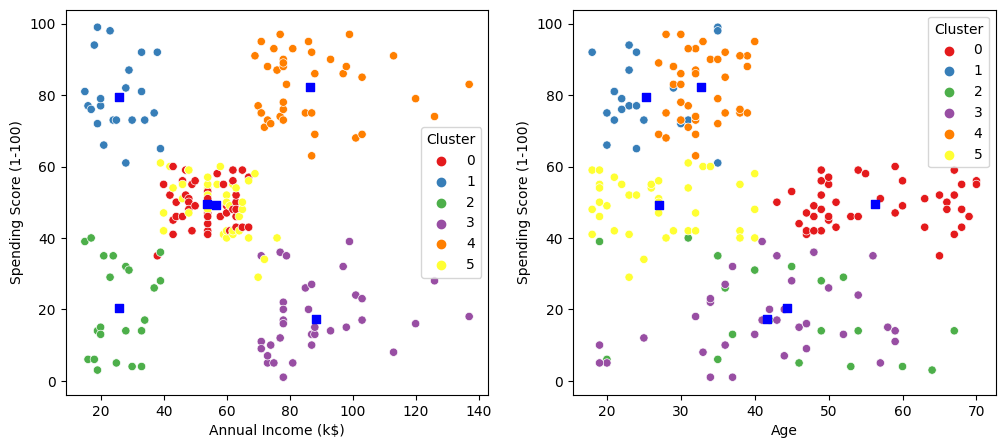

In [29]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data=KM6_clustered, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(data=KM6_clustered, x='Age', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

2 scatterplots that have a figure size value of 12x5 are created using plt.subplot((1,2), figsize(12,5)). This is assigned to the objects fig1 and (axes). The first scatterplot is created using the sns,scatterplot() function. Inside the function is data specified to KM6_clustered, followed by x equal to 'Annual Income(k$), y being equal to 'Spending score (1-100)', then hue being specified to 'Cluster', ax specified to axes[0] palette specified to 'set1', and legend being specified to full. This scatterplot will  have annual income on the x axis and spending score on the y axis from the KM6_clustered data frame. The color of each scatter point is based on cluster number, the color palette consists of purple, green, orange, red, blue. There is also a legend for cluster number and this plot will be placed in 0 index position of axes. The second scatterplot is created using the sns,scatterplot() function. Inside the function is data specified to KM6_clustered, followed by x equal to 'Age', y being equal to 'Spending score (1-100)', then hue being specified to 'Cluster', ax specified to axes[1] palette specified to 'set1', and legend being specified to full. This scatterplot will  have age on the x axis and spending score on the y axis from the KM6_clustered data frame. The color of each scatter point is based on cluster number, the color palette consists of purple, green, orange, red, blue. There is also a legend for cluster number and this plot will be placed in 1 index position of axes.
Furthermore, the  centroids of each cluster are indicated and added for scatterplot in the 0 position index of axes, This is done by extracting all the rows of column 1 and 2 from the KM_6_clusters.cluster_centers_ and making the marker blue with a style of s  and a size value of 40. Lastly the  centroids of each cluster are indicated and added for scatterplot in the 1 position index of axes, This is done by extracting all the rows of column 1 and 2 from the KM_6_clusters.cluster_centers_ and making the marker blue with a style of s  and a size value of 40. 
plt.show() will output the scatterplots.

In [30]:
# Size of Clusters
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,44
1,22
2,22
3,35
4,39
5,38


KM6_clustered.group('cluster').size.to_frame() output the number of observations based on the cluster number, this is converted into a dataframe. This assigned the variable, KM6_clust_sizes. Then column the column is labeled, KM_size by a list list containing KM_size in string format being assigned KM6_clust_sizes.columns. KM6_clust_sizes is outputted using the print function.

In [31]:
#  Create an interactive 3D view of K-Means with 6 clusters with Plotly
def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )
trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

A function called tracer is defined. The function has 3 parameters: df, n, name. The computation of the function, the cluster class is equal to the number of n and the corresponding age from the age column of df this is assigned to x. the cluster class is equal to the number of n and the corresponding Spending score from the spending score (1-100) column of df this is assigned to x. the cluster class is equal to the number of n and the corresponding Annual income from the Annual income (k$) column of df this is assigned to x. Mode is specified to 'marker', name is specified to name and marker is specified to dict where size equals 3 inside the parentheses. This function will help create a 3d interactive plot for KMeans.  
Inside the tracer function is KM6_clustered followed by a 0, and the string, 'Cluster 0'. This is assigned to trace0. Inside the tracer function is KM6_clustered followed by a 1, and the string, 'Cluster 1'. This is assigned to trace1. Inside the tracer function is KM6_clustered followed by a 2, and the string, 'Cluster 2'. This is assigned to trace2. Inside the tracer function is KM6_clustered followed by a 3, and the string, 'Cluster 3'. This is assigned to trace3. Inside the tracer function is KM6_clustered followed by a 4, and the string, 'Cluster 4'. This is assigned to trace4. Inside the tracer function is KM6_clustered followed by a 5, and the string, 'Cluster 5'. This is assigned to trace5.
A list consisting of trace0, trace1, trace2, trace3, trace4, and trace5 are assigned to the variable data.

The go.layout will assess the labels of the 3d interactive plot. Inside this function, the title will be, Cluster by K-means', this is done by title parameter being specified to "Clusters by K-Means". Then the scene parameter is specified by the dict(), this contains xaxis being "age" , y axis being "Spending Score" and z axis being Annual income. 
Lastly go.figure(data=data, layout = layout), this will create and finalize the interactive plot. py.offline.iplot(fig) will display the 3d interactive plot. 


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

The basis of this algorithm is based on the concept of density. We will use the distance (eps) and the minimum number of points within the distance as parameters. Again, we will use the Euclidean distance for the DBSCAN homework.

## Create a matrix of investigated combinations and the number of generated clusters.

In [32]:
# create a matrix of investigated combinations.
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

This nparange function will have an array that ranges from 8 to, but, not include 12.75, where each value increase by 0.25, this is assigned the variable, eps_values. Then, This nparange function will have an array that ranges from 3 to, but, not include 10, where each value increase by 1, this is assigned the variable, min_samples. Then list(product(eps_values, min_samples)) will aggregrate the arrays of eps_values and min_samples into a list. This is assigned to a variable called DBSCAN_params

In [33]:
# collecting number of generated clusters
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

Both no_of_clusters and sil_score are assigned an empty list. Then a for loop where p iterates through DBSCAN_params. Inside the for loop, the DBSCAN() function is called, containing eps specified to p[0], which is eps_value and min_samples specified to p[1], which is min_samples. This is followed by the fit function containing X_numerics. DBSCAN will fit the values of X_numeric based on the parameters that were established. Then no_of_clusters.append(len(np.unique(DBS_clustering.labels_))) will add the total number of unique clustering labels from DBCSAN into the list of no_of_clusters. Then, output of the silhouette score of X_numerics and DBS_clustering.labels_, is added to the list of sil_score. This loop will continue until p has iterated through the last element of DBSCAN_params, then p will exit the loop. 

## Create Heatmap

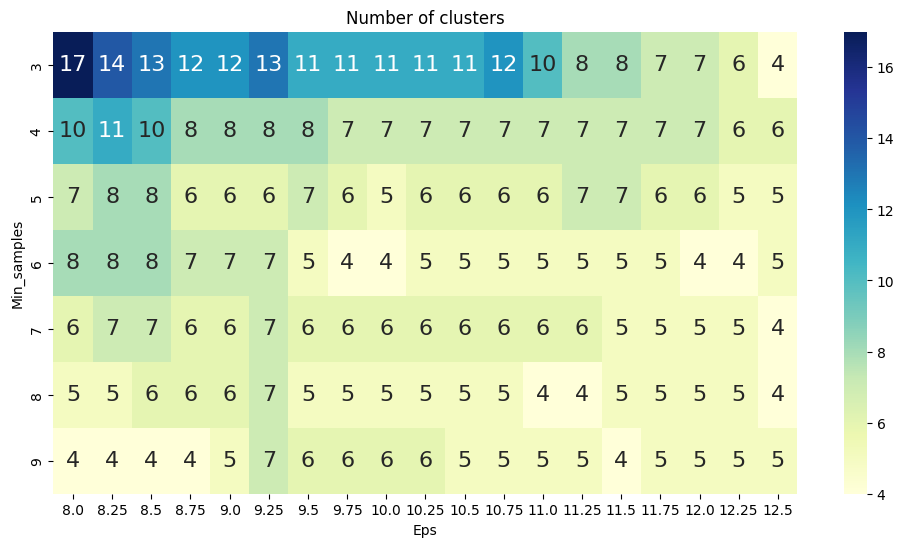

In [34]:
# The heatplot illustrates how many clusters were generated by the algorithm with the respective parameters combinations 
#created above. You can see there are clusters from 17 to 4. 
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

The pd.DataFrame.from_records containing DBSCAN_params and the columns parameter specified to a list containing Eps and Min_samples, will convert DBCAN_params into a dataframe where columns named Eps and Min_Samples. This is assigned to a variable called tmp. Then a new column is added to tmp called 'No_clusters_clusters'. The new column uses the values of the variable, no_of_clusters. Next the pd.pivot_table is used to convert tmp into a pivot table,the values parameter is specified to the No_of_clusters column, the index is based on Min_samples and the column is based on Eps, the is assigned pivot_1. 
Lastly, a plot with a figure size value of 12x6 is created using the plot.subplots() containing figsize equalling (12x6). The plot will be a heatmap, this is created by using th sns.heatmap(). Inside this function is pivot_1, followed by annot_kws specified to a dictionary where "size" is the key and 16 is the value, cmap is specified to Y1GnBu and ax is equal to ax. This will create heatmap for pivot_1 where the font size has a value 16 and the color is using Y1GnBu. The title of the heatmap is "Number of clusters" by using ax.set_title(). plt.show will display the heatmap. 

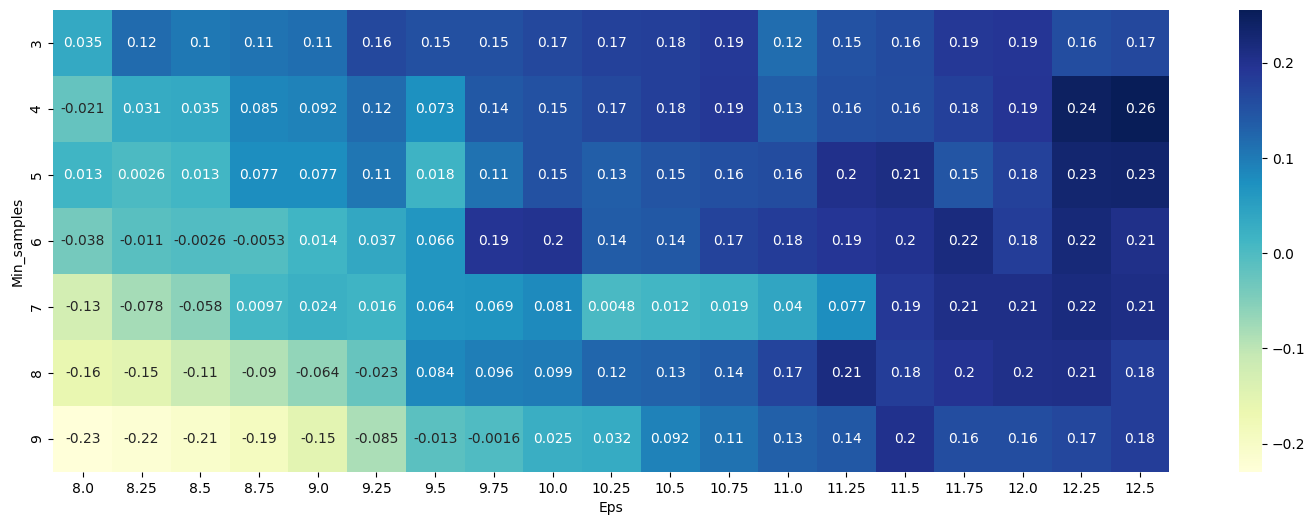

In [35]:
# In the heatmap below, we see the Global maximum is 0.26 for eps=12.5 and min_samples=4.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

The pd.DataFrame.from_records containing DBSCAN_params and the columns parameter specified to a list containing Eps and Min_samples, will convert DBCAN_params into a dataframe where columns named Eps and Min_Samples. This is assigned to a variable called tmp. Then a new column is added to tmp called 'sil_score'. The new column uses the values of the variable, sil_score. Next the pd.pivot_table is used to convert tmp into a pivot table,the values parameter is specified to the sil_score column, the index is based on Min_samples and the column is based on Eps, the is assigned pivot_1. 
Lastly, a plot with a figure size value of 18x6 is created using the plot.subplots() containing figsize equalling (18x6). The plot will be a heatmap, this is created by using th sns.heatmap(). Inside this function is pivot_1, followed by annot_kws specified to a dictionary where "size" is the key and 16 is the value, cmap is specified to Y1GnBu and ax is equal to ax. This will create heatmap for pivot_1 where the font size has a value 10 and the color is using Y1GnBu. The title of the heatmap is "Number of clusters" by using ax.set_title(). plt.show will display the heatmap.

In [36]:
#  Let's use the Global maximum settings (eps = 12.5 and min_samples = 4)

DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

  The DBSCAN function is called where the the eps value is 12.5 and the minimum number of samples is 4. The DBSCAN along with its parameters will use x_numerics to fit the model. This is assigned to DBS_clustering. A copy of the X-numerics is saved and assigned as a variable called DBSCAN_clustered. Then DBBSCAN_clustering.labels_  is assigned to DBSCAN_clustered.loc[:,'cluster']. This will append the labels to all the rows of the cluster column in DBSCAN_clustered. The dataframe, DBSCAN_clust_sizes is displayed. 


## Cluster sizes

In [42]:
# Witht the following code, you will see that 5 clusters are created AND one outlier cluster (-1) was created. 
#  You can also see that the size of clusters vary greatly and some only have a few observations.
#  Lastly, you see there are 18 outliers (-1).
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


A dataframe that shows the total number of observations by cluster is created and assigned to the variable, DBSCAN_clust_sizes. This is done by using the function, DBSCAN_clustered.groupby('Cluster').size().to_frame(). Then the column index is changed to "DBSCAN_size" for the DBSCAN_clust_sizes dataframe, by setting DBSCAN_clust_sizes.columns equal to the a list that contains the string, "DBSCAN_size". Lastly, the DBSCAN_clust_sizes is outputted. 

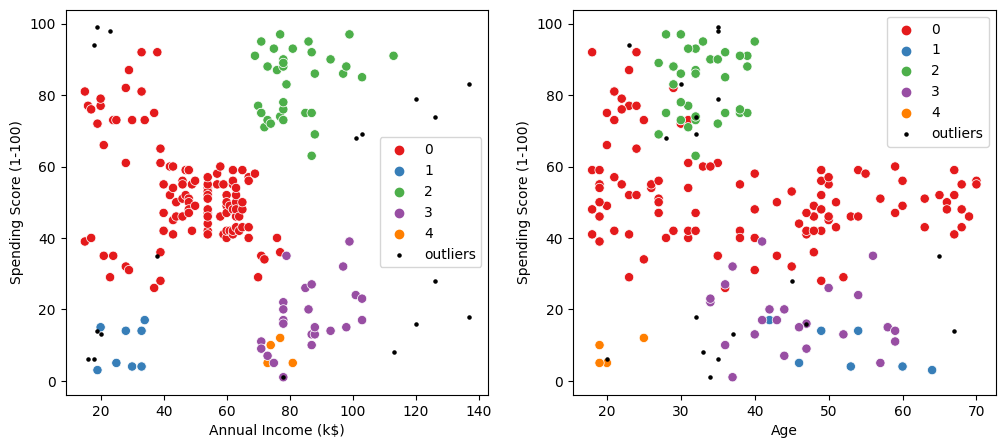

In [37]:
# With this code, you will see that there are some outliers (small black dots).  
#These points do not meet distance and minimum samples requirements to be recognized as a cluster.

outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], x = 'Age', y = 'Spending Score (1-100)',
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

 This subsets the where cluster is equal to -1 in the cluster column from DBCSAN_clustered, this is assigned the variable outliers. A figure that has figure size value of 12x5, this is assigned to the objects fig2 and (axes). A scatterplot that is meant display all clusters besides -1, where x is Annual income (k$), y is spending score (1-100), and the color of each scatter point is based the cluster number it is a part of. The plot does have a legend and each of the scatter points have size value of 45, the plot is assigned to axes[0] position. This is done by using the sns.scatterplot (). The second scatterplot uses the sns.scatterplot and consists of the same parameters besides axes[0], instead this scatterplot will be in the axes[1] position. Also using the axes[0].scatter axes[1], the variable, outliers is added to both of the scatter plots, it will be labeled outliers in the both of the legends and each of the observations from outliers will have a size value of 5 and a color value of k. Both of the font sizes of the legend in each scatterplot are adjusted to the font size value of 10. Lastly, the plt.show() will display the scatterplots that discriminate based on cluster number and outliers. 

## Compare Algorithms 

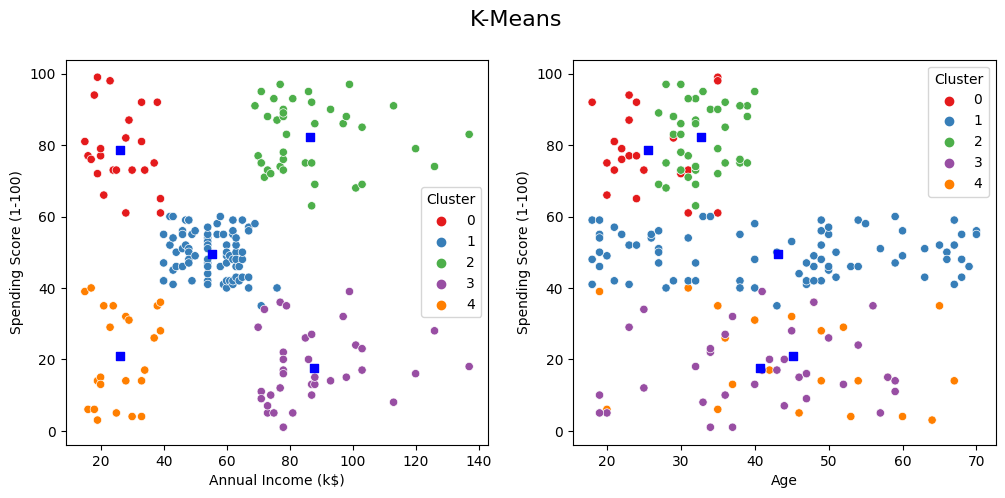

In [38]:
# K-Means with K=5
fig1.suptitle('K-Means', fontsize=16)
fig1

Using the fig1.suptitle(), fig1 is titled "k-means", where the fontsize is specified to 16. Then fig1 is outputted, which are 2 scatterplots. 

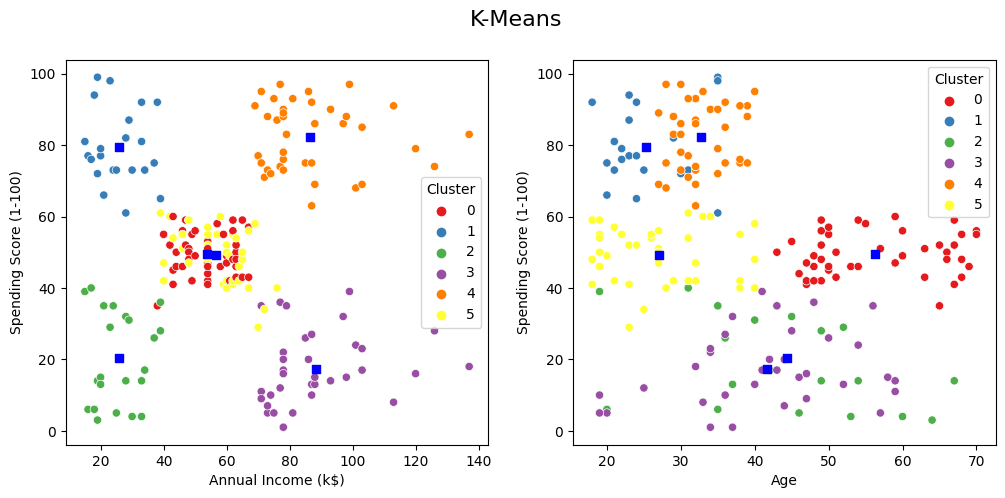

In [39]:
# K-Means with K=6
fig11.suptitle('K-Means', fontsize=16)
fig11

Using the fig11.suptitle(), fig11 is titled "k-means", where the fontsize is specified to 16. Then fig11 is outputted, which are 2 scatterplots. 

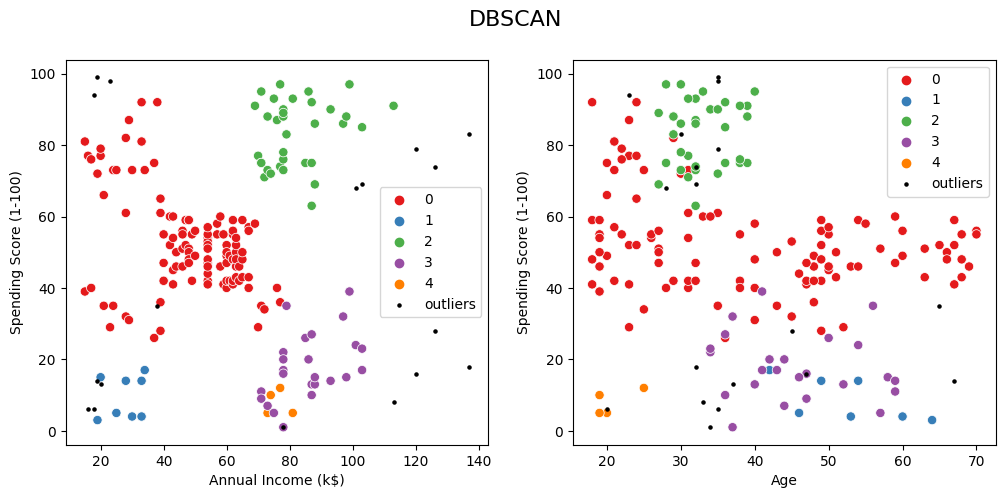

In [40]:
# DBSCAN with 5 clusters AND outliers
fig2.suptitle('DBSCAN', fontsize=16)
fig2

Using the fig2.suptitle(), fig11 is titled "DBSCAN", where the fontsize is specified to 16. Then fig2 is outputted, which are 2 scatterplots.

In [43]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size
Cluster,,
0,44.0,112.0
1,22.0,8.0
2,22.0,34.0
3,35.0,24.0
4,39.0,4.0
5,38.0,NaN
-1,NaN,18.0


The pd.concat() function will concatenate the dataframes, KM6_clust_sizes and DBSCAN_clust_sizes by the column, and observations are not sorted in a specific order. This is assigned to the variable, clusters. Then clusters is outputted. 

In [45]:
#  Print the outliers
print(DBSCAN_clustered[DBS_clustering.labels_==-1])

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
2     20                  16                       6       -1
6     35                  18                       6       -1
7     23                  18                      94       -1
10    67                  19                      14       -1
11    35                  19                      99       -1
14    37                  20                      13       -1
19    35                  23                      98       -1
40    65                  38                      35       -1
158   34                  78                       1       -1
187   28                 101                      68       -1
191   32                 103                      69       -1
192   33                 113                       8       -1
194   47                 120                      16       -1
195   35                 120                      79       -1
196   45                 126                      28       -1
197   32

Using print function when the DBS_SCAN.label is equal -1, this will display all the observations where the cluster is equal to -1 in the cluster column from the DBSCAN_clustered data frame.  

## Now that we have identified the outliers, now what?
- Why are they occurring?
- Where—and what—might the meaning be?

# The answer could differ from organization to organization, but you can't simply ignore the data, regardless of the significance.

## In addition to the above questions, it is more important to know, “How do outliers affect your testing efforts?

## The next questions to ask:

- How do I deal with the identified outliers?
- Should outliers be removed from the analysis?